<i><b>Background</b></i>: The data source is from Taiwan’s Taxation Bureau, which consists of 5 local branches all over Taiwan. In the tables below, we can have a basic understanding of the monthly salary distribution of full-time Taiwanese employees in 2005. Although the total population in Taiwan is estimated at over 23 million people in 2005, only 5.11 million people’s salary information can be accurately ascertained after considering multiple demographic criteria and checking the accuracy of income records. All of the following statistics in the tables are calculated by the Ministry of Finance, Taiwan, using the income data from the Taxation Bureau.

<img src="Age.jpg" alt="Age Distribution">

## Task 1-1

Although the average monthly salary can be an indicator of central tendency to represent the typical earnings of a Taiwanese, it may not be a good indicator sometimes, due to the impact of extreme income levels in the population. Thus, we also want to know a Taiwanese’s median monthly salary to get a full picture of the salary distribution. However, this piece of information is lacking. Please find out the possible estimate of the median monthly salary by using Python simulation utilizing sampling concepts. That is, please use simulation to generate a random sample of size 200 using the population information provided in the above tables. Moreover, we make an explicit distributional assumption on the age-specific salary subpopulations. For example, we assume that for those Taiwanese under 20 years of age, their monthly salary population will be a normal distribution with mean 17,487 and variance $7,459^2$. Similarly, the salary population of Taiwanese with age between 21 and 30 follows another normal distribution with mean 32,481 and variance $18,207^2$. All other age-specific salary subpopulations can be defined accordingly. Please use Python to obtain a random sample of size 200 and estimate the sample median monthly salary. 

<i><b>Note 1</b></i>: In your sample, the age-group composition of the sample must be the same (or very close to) the age-group composition of the population. For example, the 21-30 age group constitutes 22.86% (1,170,176/5,118,136) of the population. Hence, in your sample, 46 persons should come from the 21-30 age group.

<i><b>Note 2</b></i>: When you simulate a random value from the specified normal distribution, it is possible that the simulated value is negative. However, the monthly salary must be non-negative. Thus, please take note that your Python code should be able to make sure the simulated value is positive. This restriction can be guaranteed by imposing a conditional check (say, if statement) into the code. 

**Solution**

In [7]:
import numpy as np
from scipy import stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [42]:
sps.norm.rvs()

0.9611753688233668

In [46]:
### Define a Python function to simulate values in a normal distribution format
### use scipy.norm.rvs() function to generate normally distributed data

# Complete your Code Here
def posit_norm(mean, std, size):
    out = np.zeros(size)                      # Use np.zeros

    for i in range(size):
        #s = 0.0
        while True:
            s = sps.norm.rvs(loc = mean, scale = std)               # use sps.norm.rvs()
            if(s > 0.0):
                break
        out[i] = s
    return out



In [17]:
a = posit_norm(0,1,200000)
print(a)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
# Complete your Code Here
def hm_posit_norm(mean, std, sz):
    
    out = sps.norm.rvs(loc = mean, scale = std, size = sz)               
    
    while True in (out < 0):
        index = out<0
        out[index] = sps.norm.rvs(loc = mean, scale = std, size = sum(index))          
    return out


In [10]:
a = hm_posit_norm(0,1,200000)
print(a)

[1.61858806 0.4226105  1.94479755 ... 1.57027001 0.85910937 1.49006226]


In [12]:
 out = sps.norm.rvs(0,1,10)  

In [13]:
out

array([-0.48770931,  0.29064125, -0.11164851, -0.42014963,  1.36365274,
        0.82458784, -1.27553782,  1.11412287, -1.7839747 ,  1.0270458 ])

In [11]:
out<0

array([False, False, False,  True, False, False,  True,  True, False,
       False])

In [12]:
sum(out<0)

3

In [14]:
# Define the population summary from the tables given
pop_mean = [17487, 32481, 47044, 56863, 59514, 76572, 114779]
pop_std = [7459, 18207, 37225, 65919, 103232, 137916, 360839]
pop_prop = [0.020665727, 0.228633237, 0.351184494, 0.245451664, 0.135381905, 0.017244559, 0.001438414]

In [22]:
size200 = 200*np.array(pop_prop)
size200

array([ 4.1331454, 45.7266474, 70.2368988, 49.0903328, 27.076381 ,
        3.4489118,  0.2876828])

In [15]:
size200 = [4, 46, 70, 49, 27, 3, 1]

In [16]:
sum(size200)

200

In [17]:
sim_data200 = hm_posit_norm(pop_mean[0],pop_std[0],size200[0])

for i in range(1,len(size200)):
    sim_data200 = np.append(sim_data200, hm_posit_norm(pop_mean[i],pop_std[i],size200[i]))

In [18]:
sim_data200

array([2.38392485e+04, 1.24424319e+04, 1.51129061e+04, 2.36049416e+04,
       2.99031924e+04, 2.48222184e+04, 1.44682221e+04, 2.57193219e+04,
       2.65060653e+04, 5.51356594e+04, 5.48915085e+04, 4.83867572e+04,
       3.39320370e+04, 2.93805588e+04, 4.64845531e+04, 4.65024819e+04,
       4.50760639e+04, 7.05187327e+03, 3.52814494e+04, 5.44506499e+04,
       2.40659262e+04, 2.87761321e+04, 6.70100529e+04, 5.38912960e+02,
       1.70331173e+02, 4.69151614e+04, 2.91409028e+02, 5.49221540e+04,
       3.01006430e+04, 5.49920546e+03, 4.89143600e+04, 4.65208948e+04,
       4.57961086e+04, 2.31817134e+04, 4.36910486e+04, 4.56468429e+04,
       2.04082174e+04, 2.49967828e+04, 3.29875170e+04, 7.89521284e+04,
       6.47571308e+04, 3.66140537e+04, 1.33648236e+04, 4.60905375e+04,
       6.66752500e+03, 1.33419926e+04, 8.55740290e+04, 3.68585327e+04,
       6.24443089e+04, 5.17643536e+04, 6.98341665e+04, 4.75656559e+04,
       9.14956175e+04, 6.93587569e+04, 1.70359446e+04, 9.64695114e+03,
      

In [19]:
np.median(sim_data200)

51643.72850652598

In [20]:
median_200 = np.median(sim_data200)
print("The estimated population salary median is", median_200)
print("This estimated median is computed by the sample median from a representative sample od size 200")

The estimated population salary median is 51643.72850652598
This estimated median is computed by the sample median from a representative sample od size 200


## Task 1-2

Please perform repeated random sampling of size 200 from the Taiwanese population and estimate the sampling distribution of sample median monthly salary. (The sampling distribution must be constructed with 5000 repeated sampling outcomes and you need to visualize the sampling distribution simulated as your answers). 

**Solution**

In [21]:
# Complete your Code Here
repeat = 5000
repeat_median = np.zeros(repeat, dtype = float)

count = 1
while True:
    combined = posit_norm(pop_mean[0], pop_std[0], size200[0])
    for i in range(1,len(pop_mean)):
        sam = posit_norm(pop_mean[i], pop_std[i], size200[i]) # Complete your Code Here
        combined = np.concatenate((combined, sam))  # use np.concatenate()
    
    repeat_median[count-1] = np.median(combined)
    if(count == repeat):
        break
    count += 1    



NameError: name 'posit_norm' is not defined

In [22]:
# Complete your Code Here
repeat = 5000
repeat_median = np.zeros(repeat, dtype = float)

count = 1
while True:
    combined = hm_posit_norm(pop_mean[0], pop_std[0], size200[0])
    for i in range(1,len(pop_mean)):
        sam = hm_posit_norm(pop_mean[i], pop_std[i], size200[i]) # Complete your Code Here
        combined = np.concatenate((combined, sam))  # use np.concatenate()
    
    repeat_median[count-1] = np.median(combined)
    if(count == repeat):
        break
    count += 1    



In [55]:
repeat_median

array([47207.65338679, 51751.87163438, 55530.11102078, ...,
       55507.23017561, 45575.55122598, 51011.74416082])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30000.0, 70000.0)

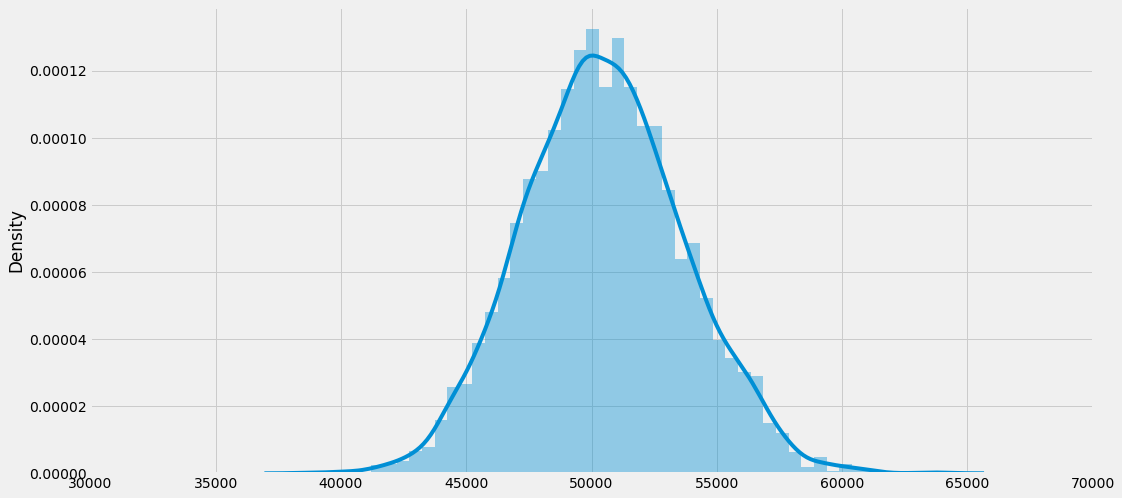

In [26]:
fig=plt.figure(figsize=(16, 8))
sns.distplot(repeat_median)
plt.xlim(30000,70000)

## Task 1-3	

Please repeat your repeated sampling in Task 1-2, but now you need to increase the sample size from 200 to 500 and 1000. Comment on the shape of the sampling distribution of the median monthly salary. When the sample size increases, is the sampling distribution of the median monthly salary approaching a normal distribution? (Please draw a panel of histograms to present your visualization).

**Solution**

In [27]:
size500 = np.array([10, 114, 175, 123, 68, 9, 1], dtype = int)
size1000 = np.array([21, 229, 351, 245, 135, 17, 2], dtype = int)

repeat = 5000
repeat_median500 = np.zeros(repeat, dtype = float)
repeat_median1000 = np.zeros(repeat, dtype = float)

count = 1
while True:
    combined500 = hm_posit_norm(pop_mean[0], pop_std[0], size500[0])
    combined1000 = hm_posit_norm(pop_mean[0], pop_std[0], size1000[0])
    for i in range(1, len(pop_mean)):
        ### Write your code here for this loop
        
        sam500 = hm_posit_norm(pop_mean[i], pop_std[i], size500[i]) # Complete your Code Here
        sam1000 = hm_posit_norm(pop_mean[i], pop_std[i], size1000[i]) # Complete your Code Here
        
        combined500 = np.concatenate((combined500, sam500))  # use np.concatenate()    
        combined1000 = np.concatenate((combined1000, sam1000))  # use np.concatenate()    
        
    
    repeat_median500[count-1] = np.median(combined500)    #Complete this line of code
    repeat_median1000[count-1] = np.median(combined1000)    #Complete this line of code
    if(count == repeat):
        break
    count += 1 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

(30000.0, 70000.0)

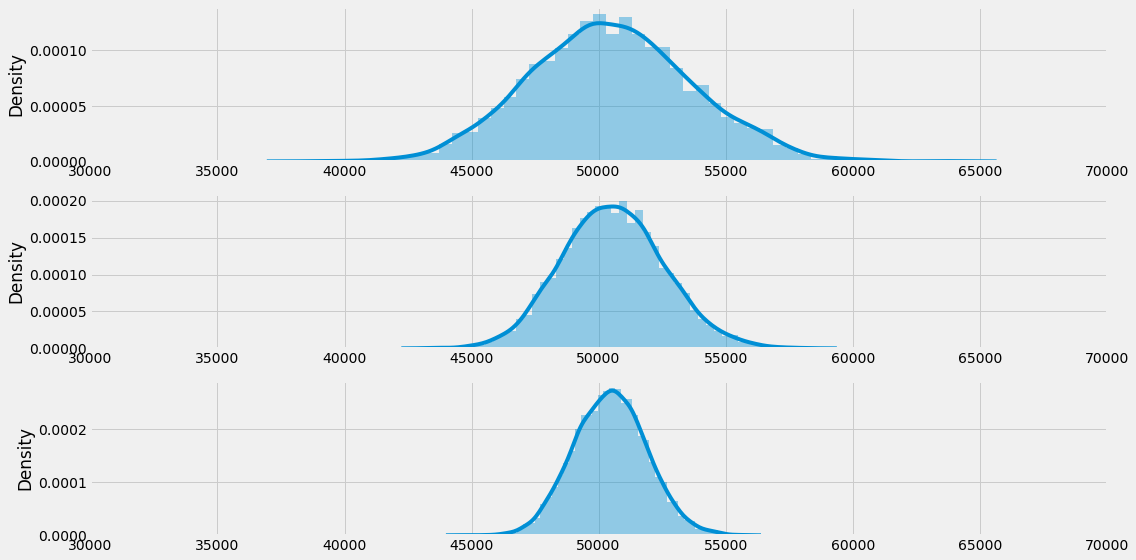

In [25]:
fig=plt.figure(figsize=(16, 8))

plt.subplot(3,1,1)
sns.distplot(repeat_median)
plt.xlim(30000,70000)

plt.subplot(3,1,2)
sns.distplot(repeat_median500)
plt.xlim(30000,70000)

plt.subplot(3,1,3)
sns.distplot(repeat_median1000)

plt.tight_layout()
plt.xlim(30000,70000)

C:\Users\tanhm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tanhm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tanhm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

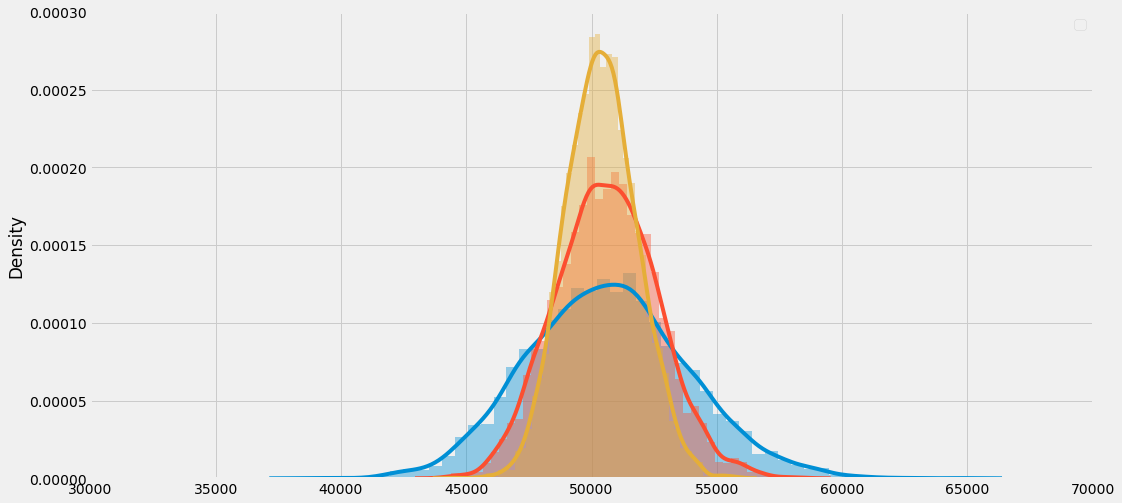

In [61]:
fig=plt.figure(figsize=(16, 8))
sns.distplot(repeat_median)
sns.distplot(repeat_median500)
sns.distplot(repeat_median1000)
plt.legend(loc = "best")
plt.xlim(30000,70000)
plt.show()